In [20]:
import openweathermapy.core as owm
import requests
from citipy import citipy
from pprint import pprint
import pandas as pd
import random
from config import api_key
import matplotlib.pyplot as plt

**Create a list of random cities**

# this code kills the kernel, why?
cities = {}

def onemoreloop():
    return citylistcreator()

def citylistcreator():
    for x in range(500):
        coord = ((round(random.uniform(-90.00, 90.00),2)),(round(random.uniform(-180.00, 180.00),2)))
        citydata = citipy.nearest_city(*coord)
        city = citydata.city_name
        if city not in cities:
            cities[city] = coord
        else:
            try:
                return onemoreloop()
            except(RecursionError):
                return onemoreloop()

citylistcreator()
print(len(cities))

In [193]:
# This works fine, but the output number is unpredictable

cities = {}

for x in range(1200):
    coord = ((round(random.uniform(-90.00, 90.00),2)),(round(random.uniform(-180.00, 180.00),2)))
    citydata = citipy.nearest_city(*coord)
    city = citydata.city_name
    if city not in cities:
        cities[city] = coord
    else:
        pass

print(len(cities))

544


In [194]:
settings = {"units": "metric", "appid": api_key} 

In [195]:
one_city = owm.get_current((-8.24, -161.24), **settings)

In [184]:
from requests.utils import quote

url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
temp = []
lat = []
humidity = []
wind = []
cloudiness = []
name = []

for city in cities:
    latidude = cities[city][0]
    longtitude = cities[city][1]
    city = quote(city, safe='')
    ind_url = f'{url}appid={api_key}&units={units}&lat={latidude}&lon={longtitude}'
    data_json = requests.get(ind_url).json()
    
    #print(ind_url)
    
    temp.append(data_json['main']['temp'])
    lat.append(data_json['coord']['lat'])
    humidity.append(data_json['main']['humidity'])
    cloudiness.append(data_json['clouds']['all'])
    wind.append(data_json['wind']['speed'])
    name.append(data_json['name'])
    
dframe_json = pd.DataFrame({'City Name': name, 'Temperature': temp, 'Latitude': lat, 'Humidity': humidity,
                            'Wind Speed': wind, 'Cloudiness': cloudiness})

dframe_json.head()

563


,City Name,Cloudiness,Humidity,Latitude,Temperature,Wind Speed
0,,20,100,18.68,75.50,9.19
1,,88,100,26.36,66.64,24.74
2,Xinling,24,74,30.92,61.96,1.70
3,,64,100,-68.15,28.84,21.50
4,Tyrma,0,43,50.32,44.41,8.08


In [196]:
alldata = [owm.get_current(cities[city], **settings) for city in cities]
print(len(alldata))

544


In [197]:
search = ['name', 'main.temp','main.humidity', 'clouds.all', 'wind.speed', 'coord.lat' ]
extracted_data = [city(*search) for city in alldata]

df_weather = pd.DataFrame(extracted_data)
df_weather.columns = ['Name', 'Temperature', 'Humidity(%)', 'Cloudiness(%)', 'Wind Speed', 'Latitude']
df_weather.head()

,Name,Temperature,Humidity(%),Cloudiness(%),Wind Speed,Latitude
0,,-22.81,66,0,5.61,-82.44
1,,28.74,100,0,3.26,8.29
2,Talapker,6.27,79,68,3.41,44.37
3,,18.32,97,92,7.46,-38.23
4,,-40.61,66,48,7.76,-88.24


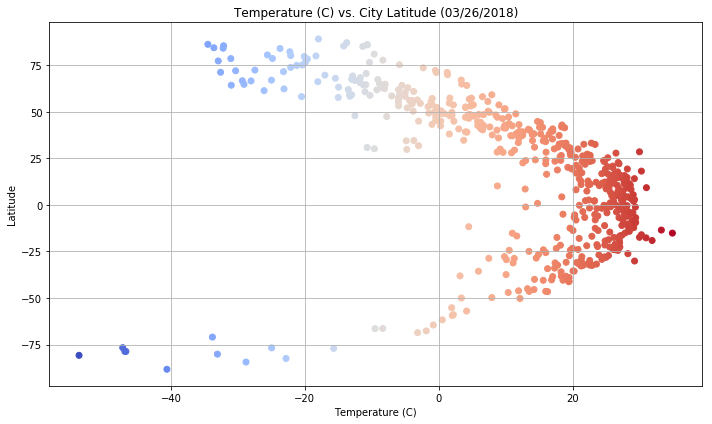

In [198]:
import datetime
current_date = datetime.datetime.now().date().strftime("%m/%d/%Y")
plt.figure(figsize=(10,6))
plt.scatter(df_weather['Temperature'], df_weather['Latitude'], c=df_weather['Temperature'], cmap='coolwarm')
plt.ylabel('Latitude')
plt.xlabel('Temperature (C)')
plt.title(f'Temperature (C) vs. City Latitude ({current_date})')
plt.tight_layout()
plt.grid()

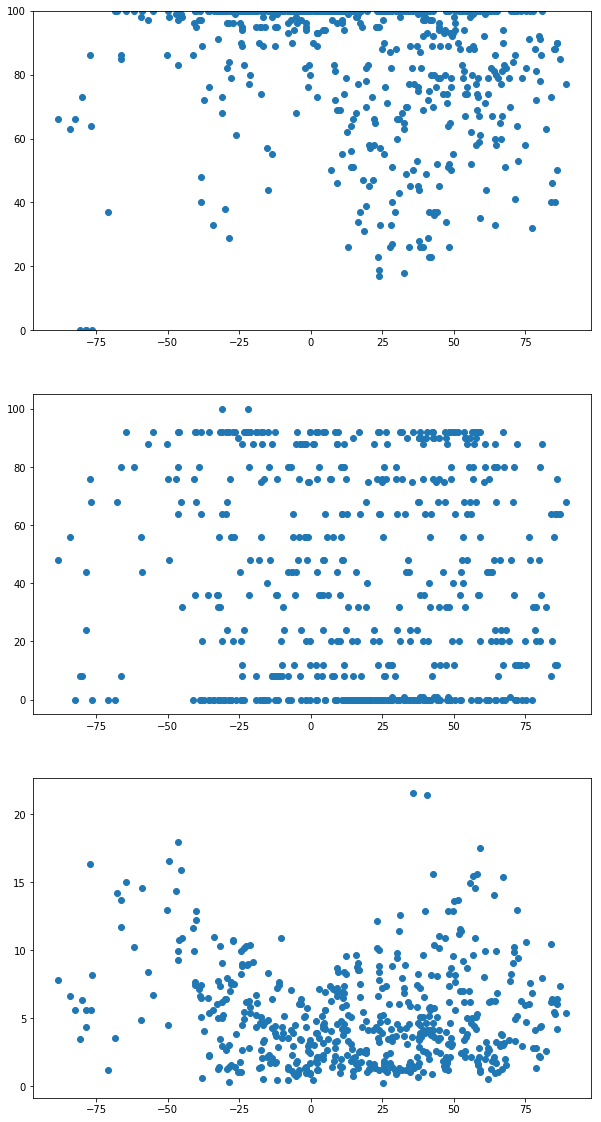

In [199]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=False)
#ax1.set_xlim(min(df_weather['Latitude'])-16, max(df_weather['Latitude'])+20)
fig.set_size_inches(10,20)

ax1.scatter(df_weather['Latitude'], df_weather['Humidity(%)'])
ax1.set_ylim(0, 100)

ax2.scatter(df_weather['Latitude'], df_weather['Cloudiness(%)'])

ax3.scatter(df_weather['Latitude'], df_weather['Wind Speed'])

(-65, 87.5183466988508)

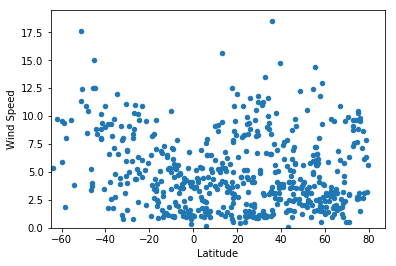

In [200]:
df.plot(kind='scatter', x='Latitude', y='Wind Speed')
plt.ylim(0, None)
plt.xlim(-65, None)